## Sentiwordnet ohne Entfernen von Stopwords und Satzzeichen

In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib as mpl  # to visualize data
import seaborn as sns # to visualize data
import matplotlib.colors as mcolors # to visualize colors
import string # collection of alphabets, words or other characters
import re # regular expression support
import nltk 
from nltk.corpus import stopwords
from string import punctuation 
# import gensim # representing documents as semantic vectors
from sklearn.metrics import *

from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/I570078/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/I570078/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/I570078/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/I570078/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Einstellung, um kompletten Inhalt der Spalte 'Text' anzuzeigen.

In [2]:
pd.set_option('display.max_colwidth', None)

Einlesen der Daten

In [4]:
df_sentiwordnet_with_stopwords = pd.read_csv('../../../Data-Preparation/sentiment140/traindata_with_stopwords_preprocessed.csv')

Überprüfung des Datensatzes

In [5]:
df_sentiwordnet_with_stopwords['target'].value_counts()

target
4    640000
0    640000
Name: count, dtype: int64

In [6]:
df_sentiwordnet_with_stopwords.head()

,Text,target,Ground_Truth_Label
0,Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time,4,positive
1,Had a 2nd interview today. It's looking promising.,4,positive
2,@EmilyAlbracht I feel your pain!,0,negative
3,http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found Luv amphibians!,4,positive
4,is lonely because all my housemates have gone to the pub,0,negative


In [7]:
df_sentiwordnet_with_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>    1280000
Name: count, dtype: int64

Dieser Classifier nutzt nur die Häufigste Wortbedeutung (Lemma) der jeweiligen Worte. Taucht beispielsweise das Wort "Hund" auf, wird angenommen, dass es sich um die Bedeutung des Wortes "Hund" im Sinne eines Tieres handelt und nicht etwa um eine Beleidigung. Entsprechend wird auch der Sentiment-Score bestimmt.

In [8]:
def superNaiveSentiment(review):
    reviewPolarity = 0.0
    numExceptions = 0
    words = review.lower().split()
    
    for word in words:
        weight = 0.0
        synsets = list(swn.senti_synsets(word))
        if synsets:
            common_meaning = synsets[0]
            pos_score = common_meaning.pos_score()
            neg_score = common_meaning.neg_score()
            if pos_score > neg_score:
                weight += pos_score
            elif pos_score < neg_score:
                weight -= neg_score
        else:
            numExceptions += 1
        reviewPolarity += weight
    return reviewPolarity


In [9]:
df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'] = df_sentiwordnet_with_stopwords['Text'].apply(lambda x: 'positive' if superNaiveSentiment(x) >= 0 else 'negative')

In [10]:
df_sentiwordnet_with_stopwords.head()

,Text,target,Ground_Truth_Label,Sentiwordnet_Classification
0,Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time,4,positive,positive
1,Had a 2nd interview today. It's looking promising.,4,positive,positive
2,@EmilyAlbracht I feel your pain!,0,negative,positive
3,http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found Luv amphibians!,4,positive,positive
4,is lonely because all my housemates have gone to the pub,0,negative,positive


Evaluation

In [11]:
accuracy = accuracy_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.5829796875


In [12]:
accuracy = accuracy_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
precision = precision_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')
recall = recall_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')
f1 = f1_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')


In [13]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.58
Precision: 0.56
Recall: 0.83
F1 Score: 0.67


In [14]:
print("\nClassification Report:\n")
print(classification_report(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.66      0.34      0.45    640000
    positive       0.56      0.83      0.67    640000

    accuracy                           0.58   1280000
   macro avg       0.61      0.58      0.56   1280000
weighted avg       0.61      0.58      0.56   1280000



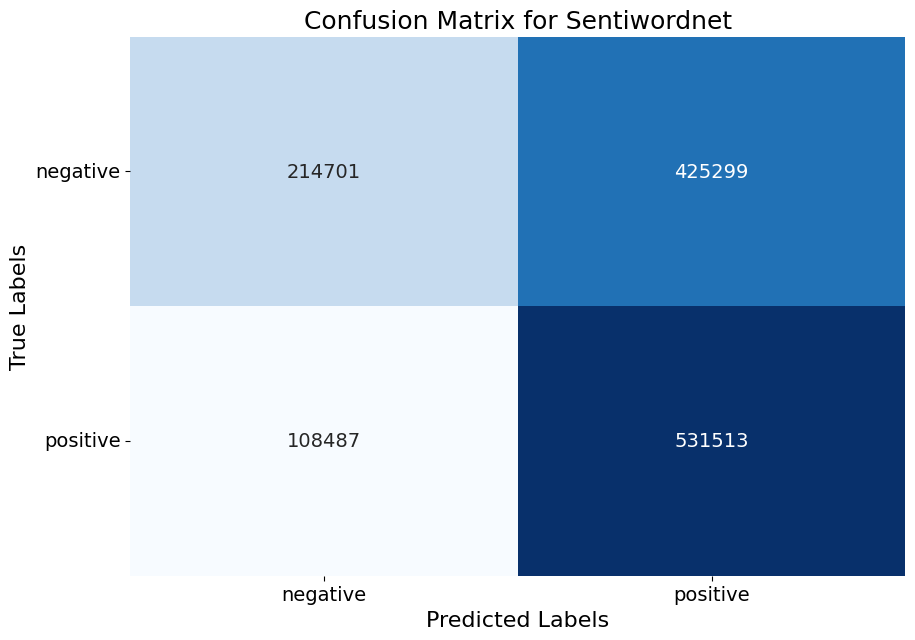

In [16]:
cm_nb = confusion_matrix(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])


# Erstellen der Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Sentiwordnet with stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()